In [1]:
import numpy as np
import matplotlib.pyplot as plt

m1 = 0.1
m2 = 0.75
V0 = 20
R = 0.3
vf = 2.353
g = 10

In [2]:
#Runge-Kutta per c e c'
def f(theta,v,F) :
    return (((F*np.cos(theta))/(m2+(m1*(np.sin(theta))**2)))-((m1*(v**2)*(np.sin(theta))**2)/(2*R*(m2+(m1*(np.sin(theta)**2)))))-(((m1+m2)*g*np.sin(theta))/(m2+(m1*(np.sin(theta))**2))))

def f_3(theta,eta,F):
    return f(theta, R*eta, F)/R

n = 1000
tfin = 0.35
h = tfin/n
theta0 = 0
eta0 = 0
t0 = 0
F = 6
def RK4bis(F):
    t = t0
    theta = theta0
    eta = eta0
    T = np.zeros(n)
    X = np.zeros(n)
    Y = np.zeros(n)
    for i in range (n):
        T[i] = t

        K1 = h*eta
        M1 = h*f_3(theta, eta, F)

        K2 = h*(eta+M1/2)
        M2 = h*f_3(theta+(K1/2), eta+(M1/2), F)

        K3 = h*(eta+(M2/2))
        M3 = h*f_3(theta+(K2/2), eta+(M2/2), F)

        K4 = h*(eta+(M3/2))
        M4 = h*f_3(theta+K3, eta+M3, F)

        theta += (K1/6)+(K2/3)+(K3/3)+(K4/6)
        eta += (M1/6)+(M2/3)+(M3/3)+(M4/6)

        X[i] = theta
        Y[i] = eta*R

        t = t+h
        
    MRK = np.array((T, X, Y))
    return MRK                  #M è una matrice con 3 righe ed n colonne. La prima riga è quella del tempo, la seconda riga è quella di teta e la terza riga è V (Tutto in funzione di Ft grazie alla trasformazione di coordinate)



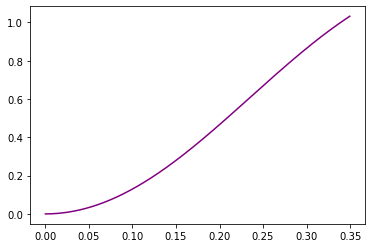

In [3]:
J = RK4bis(6)
plt.plot(RK4bis(6)[0], RK4bis(6)[1], color="purple")

In [4]:
#qua sfrutto risultati noti della meccanica classica

v10 = 20
omega0 = (v10/R)*(m1/(m1+m2))
alpha0=0
tempo0=0

def seno(alpha):
    return (-(g/R)*np.sin(alpha))

def alpha():
    alpha = alpha0
    omega = omega0
    tempo=tempo0
    TT = np.zeros(n)
    AL = np.zeros(n)
    OM = np.zeros(n)
    for i in range (n):
        TT[i] = tempo

        K1 = h*omega
        M1 = h*seno(alpha)
        
        K2 = h*(omega+M1/2)
        M2 = h*seno(alpha+(K1/2))

        K3 = h*(omega+M2/2)
        M3 = h*seno(alpha+(K2/2))
        
        K4 = h*(omega+M3/2)
        M4 = h*seno(alpha+K3)

        alpha += (K1/6)+(K2/3)+(K3/3)+(K4/6)
        omega += (M1/6)+(M2/3)+(M3/3)+(M4/6)

        AL[i] = alpha
        OM[i] = omega

        tempo = tempo+h
        
    MALPHA = np.array((TT, AL, OM))
    return MALPHA               
    



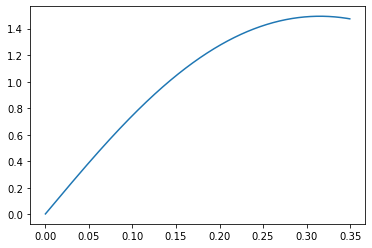

In [5]:
J = alpha()
plt.plot(alpha()[0], alpha()[1])

In [9]:
#mo devo mettere tutto insieme 

def ManuTiAmo(F,t,tc):
    if t<tc :
        J = RK4bis(F)
        plt.plot(RK4bis(F)[0], RK4bis(F)[1], color="purple")
    else:
        J = alpha()
        plt.plot(alpha()[0], alpha()[1], color="yellow")
    

TypeError: ManuTiAmo() missing 1 required positional argument: 'tc'